# Análise de Dados

## Desaparecimento de pessoas no DF - Localizados ...

Acompanhamento das ocorrências de desaparecimento e localização de pessoas no DF - Comparativo dos anos de 2016 e 2017.

In [2]:
import pandas as pd
import folium
from folium import plugins
import matplotlib.pyplot as plt

In [3]:
df_desaparecidos = pd.read_csv('./dados/desaparecimento-de-pessoas-por-rajandez-2017.csv', sep = ';', skiprows = 4, encoding='latin-1')
df_desaparecidos_sexo = pd.read_csv('./dados/desaparecimento-de-pessoasidade-e-sexojandez-2017.csv', sep = ';', skiprows = 4, encoding='latin-1')
df_localizados = pd.read_csv('./dados/desaparecimento-de-pessoaslocalizadosjandez-2017.csv', sep = ';', skiprows = 4, encoding='latin-1')

In [19]:
df_desaparecidos.iloc[0:31]

,RANKING 2017,REGIÃO ADMINISTRATIVA,2016,2017,VARIAÇÃO ABSOLUTA,PERCENTUAL DE PARTICIPAÇÃO - ANO 2017
0,1ª,RA 09_CEILANDIA,475,415.0,-60.0,"15,63%"
1,2ª,RA 12_SAMAMBAIA,282,256.0,-26.0,"9,64%"
2,3ª,RA 03_TAGUATINGA,209,224.0,15.0,"8,43%"
3,4ª,RA 06_PLANALTINA,212,205.0,-7.0,"7,72%"
4,5ª,RA 01_BRASILIA,204,199.0,-5.0,"7,49%"
5,6ª,RA 02_GAMA,175,163.0,-12.0,"6,14%"
6,7ª,RA 15_RECANTO DAS EMAS,143,157.0,14.0,"5,91%"
7,8ª,RA 14_SAO SEBASTIAO,146,122.0,-24.0,"4,59%"
8,9ª,RA 13_SANTA MARIA,112,94.0,-18.0,"3,54%"
9,10ª,RA 10_GUARA,94,90.0,-4.0,"3,39%"


### Desaparecidos por faixa etária e sexo

In [63]:
df = df_desaparecidos_sexo.iloc[0:7]
df.columns = ['faixa_etaria','ocorrencias','porcentagem_total','masculino','porcentagem_masc','feminino','porcentagem_fem']

In [64]:
del df['porcentagem_total']

In [65]:
del df['porcentagem_masc']

In [66]:
del df['porcentagem_fem']

In [67]:
df

,faixa_etaria,ocorrencias,masculino,feminino
0,ATÉ 11 ANOS,137.0,82.0,55.0
1,DE 12 A 17 ANOS,1073.0,338.0,735.0
2,DE 18 A 30 ANOS,670.0,439.0,231.0
3,DE 31 A 50 ANOS,611.0,474.0,137.0
4,MAIS DE 50 ANOS,244.0,180.0,64.0
5,NÃO INFORMADO,32.0,25.0,7.0
6,TOTAL,2767.0,1538.0,1229.0


Text(0,0.5,'Número de desaparecidos')

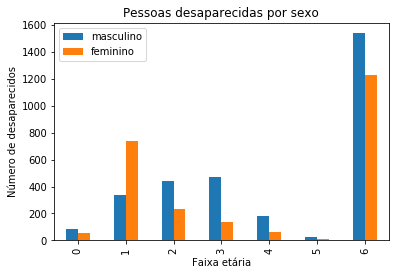

In [70]:
ax = df[['masculino', 'feminino']].plot(kind = 'bar')
plt.title('Pessoas desaparecidas por sexo')
plt.xlabel('Faixa etária')
plt.ylabel('Número de desaparecidos')

In [26]:
ax

### Pessoas localizadas

In [47]:
df_localizados.iloc[0:7]
df_localizados.columns = ['faixa_etaria','ainda_desaparecidos','porcentagem_desaparecidos','localizados','porcentagem_localizados']

In [71]:
df_localizados[0:7]

,faixa_etaria,ainda_desaparecidos,porcentagem_desaparecidos,localizados,porcentagem_localizados
0,ATÉ 11 ANOS,4.0,3%,133.000,"97,08%"
1,DE 12 A 17 ANOS,62.0,6%,1011.000,"94,22%"
2,DE 18 A 30 ANOS,62.0,9%,608.000,"90,75%"
3,DE 31 A 50 ANOS,68.0,11%,543.000,"88,87%"
4,MAIS DE 50 ANOS,31.0,13%,213.000,"87,30%"
5,NÃO INFORMADO,0.0,0%,80.000,"100,00%"
6,TOTAL,227.0,"6,50%",2.588,"93,50%"


In [60]:
bsb = folium.Map( 
    location = [-15.7797200,-47.9297200],
    zoom_start=11
)

In [62]:
bsb

In [59]:
coordenadas = df_desaparecidos[['LATITUDE', 'LONGITUDE']].dropna().values

KeyError: "['LATITUDE' 'LONGITUDE'] not in index"